In [38]:
from PIL import Image
from pathlib import Path
import google.generativeai as genai
from IPython.display import display
from matplotlib import pyplot as plt
import pandas as pd
from io import BytesIO
import urllib.request
import time

In [26]:
GEMINI_PROMPTS = [
    (
        "Analyze the provided image of a Lego piece. Provide a detailed, "
        "objective description of the piece's shape, size, features, and "
        "connection points. Do not mention the color of the piece. Focus "
        "solely on the geometrical and structural aspects. Be as precise "
        "as possible in describing studs, holes, any unique protrusions "
        "or indentations, and how it connects with other bricks. Use "
        "standard Lego terminology when appropriate (e.g., stud, axle "
        "hole, technic pin hole, plate, brick, slope, tile etc). If "
        "dimensions are discernible or can be estimated by referencing "
        "standard LEGO brick dimensions, please include them using the "
        "number of stud equivalents in length, width, and height. For "
        "example, a \"1x2 brick\" rather than stating it as a \"rectangle\". "
        "Avoid subjective terms and focus on concrete, verifiable features."
    ),
    (
        "Analyze the provided image of a Lego piece. Provide a detailed, "
        "objective description of the piece's shape, size, features, and "
        "connection points. Do not mention the color of the piece. Focus "
        "solely on the geometrical and structural aspects. Be as precise "
        "as possible in describing studs, holes, any unique protrusions "
        "or indentations, and how it connects with other bricks. Use "
        "standard Lego terminology when appropriate (e.g., stud, axle "
        "hole, technic pin hole, plate, brick, slope, tile etc). If "
        "dimensions are discernible or can be estimated by referencing "
        "standard LEGO brick dimensions, please include them using the "
        "number of stud equivalents in length, width, and height. For "
        "example, a '1x2 brick' rather than stating it as a 'rectangle'. "
        "Avoid subjective terms and focus on concrete, verifiable features. "
        "The description should directly state the features of the Lego "
        "piece, avoiding phrases like 'The image shows...' or 'This is an "
        "image of...'. Start immediately with the description of the "
        "piece itself."
    ),
    # good caption, however results in long captions
    (
        "Analyze the provided image of a Lego piece. Provide a detailed "
        "description of the piece's shape, size, features, connection points, "
        "and any distinctive surface markings or patterns. Include the color "
        "of the piece, stating the specific color if possible (e.g., "
        "'bright red', 'dark bluish gray', 'light yellow', etc., instead "
        "of just 'red', 'gray', or 'yellow'). Focus on the geometrical and "
        "structural aspects as well as any unique markings. Be as precise "
        "as possible in describing studs, holes, any unique protrusions or "
        "indentations, connection points, and the location and nature of "
        "surface markings such as printed designs, stickers, or molded "
        "patterns. Use standard Lego terminology when appropriate (e.g., "
        "stud, axle hole, technic pin hole, plate, brick, slope, tile, etc.). "
        "If dimensions are discernible or can be estimated by referencing "
        "standard LEGO brick dimensions, please include them using the number "
        "of stud equivalents in length, width, and height. For example, use "
        "'1x2 brick' instead of stating 'rectangle'. Avoid subjective terms "
        "and focus on concrete, verifiable features and observations. The "
        "description should directly state the features of the Lego piece, "
        "avoiding phrases like 'The image shows...' or 'This is an image "
        "of...'. Start immediately with the description of the piece itself."
    ),
    # same as above, but with shorter caption outputs
    (
        "Analyze the provided image of a Lego piece. Provide a concise, "
        "objective description of the piece's shape, size, key features, "
        "connection points, and any distinctive surface markings or patterns. "
        "Include the color of the piece, using a specific color if possible "
        "(e.g., 'bright red', 'dark bluish gray', 'light yellow'). Be precise "
        "in describing studs, holes, connection types, and the nature of any "
        "printed designs or surface features. Use standard Lego terminology "
        "(stud, axle hole, etc.). If possible, use stud equivalents for "
        "length, width, and height (e.g., '1x2 brick'). The description "
        "must be within 50-60 words and should start directly with the "
        "description of the piece itself, avoiding phrases like 'The "
        "image shows...'. Aim for brevity while maintaining all key details."
    )
]

In [4]:
gemini_key = "your-api-key-here"

In [13]:
def caption_with_gemini(images, prompt):
    genai.configure(api_key=gemini_key)
    gemini_flash = genai.GenerativeModel("gemini-1.5-flash-002")

    captions = []
    for image in images:
        caption = gemini_flash.generate_content([prompt, image])
        captions.append(caption.text)
    return captions

In [6]:
table = Path("datasets/lego_brick_captions/lego_bricks_no_img.parquet")
df = pd.read_parquet(table)

In [39]:
# randomly sample 5 images
samples = df.sample(5)
images = []
for _, row in samples.iterrows():
    url = row["img_url"]
    response = urllib.request.urlopen(url)
    img = Image.open(BytesIO(response.read()))
    images.append(img)

captions_0 = caption_with_gemini(images, GEMINI_PROMPTS[0])
time.sleep(10)
captions_1 = caption_with_gemini(images, GEMINI_PROMPTS[1])
time.sleep(10)
captions_2 = caption_with_gemini(images, GEMINI_PROMPTS[2])
time.sleep(10)
captions_3 = caption_with_gemini(images, GEMINI_PROMPTS[3])
captions = [captions_0, captions_1, captions_2, captions_3]

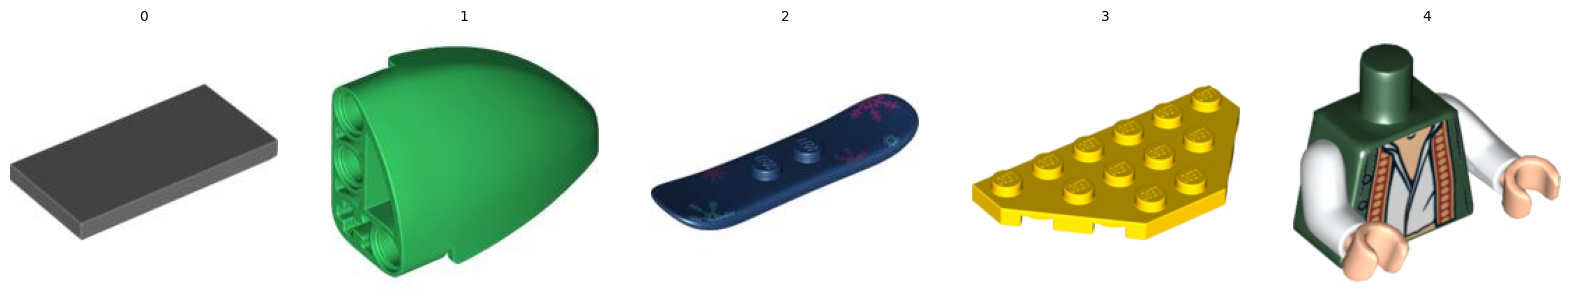

- [prompt 0]
	-[0@101 words] The image shows a rectangular Lego plate.  It measures approximately 1 stud wide and 6 studs long.  The height is equivalent to a single plate (1/2 stud).  The piece is flat on both its top and bottom surfaces.  The top surface is smooth and featureless, while the bottom surface features a series of parallel grooves, indicative of a standard Lego plate construction.  There are no studs, tubes, holes, axles, or any other protrusions or significant indentations present on the piece.  Its connection method relies solely on the grip and engagement of the bottom surface's grooves with the studs of compatible bricks.

	-[1@212 words] The Lego element is a molded part resembling a curved aerodynamic shell or fairing.  It is approximately 2 studs wide at its widest point and approximately 3 studs long at its longest point. Height is difficult to precisely determine due to the curved shape but appears to be roughly 2 studs at its highest point.

The piece features a

In [44]:
# plot the images in a grid with 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for idx, img in enumerate(images):
    ax = axs[idx]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(idx, fontsize=10)

plt.show()

for prompt_idx, caption in enumerate(captions): 
    print(f"- [prompt {prompt_idx}]")
    for idx, caption in enumerate(caption):
        print(f"\t-[{idx}@{len(caption.split())} words] {caption}")